In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount("/content/drive")

In [2]:
#Write base url for the data.
baseUrl = "."
os.chdir(baseUrl)

In [104]:
dfCovid = pd.read_pickle('DataRaw/covid19.pkl')
dfCovid.shape

(572270, 21)

In [105]:
dfCovid.describe().T

,count,unique,top,freq
id_de_caso,572270,572270,89700,1
fecha_de_notificaci_n,572270,175,2020-07-27T00:00:00.000,12078
c_digo_divipola,572270,1014,11001,199324
ciudad_de_ubicaci_n,572270,942,Bogotá D.C.,199324
departamento,572270,37,Bogotá D.C.,199324
atenci_n,572270,6,Recuperado,407121
edad,572270,110,30,15385
sexo,572270,4,M,294813
tipo,572270,5,En estudio,542037
estado,572270,6,Leve,462449


In [97]:
dfCovid.groupby(['atenci_n']).size()

atenci_n
Casa            123765
Fallecido        18184
Hospital         20176
Hospital UCI      1853
N/A               1171
Recuperado      407121
dtype: int64

In [106]:
dfCovid=dfCovid[dfCovid['atenci_n']!='N/A']
dfCovid.groupby(['atenci_n']).size()

atenci_n
Casa            123765
Fallecido        18184
Hospital         20176
Hospital UCI      1853
Recuperado      407121
dtype: int64

In [107]:
df_grouped = dfCovid.groupby(['fecha_de_notificaci_n']).size()
df_grouped

fecha_de_notificaci_n
2020-03-02T00:00:00.000       1
2020-03-06T00:00:00.000       1
2020-03-07T00:00:00.000       1
2020-03-08T00:00:00.000       2
2020-03-09T00:00:00.000       3
                           ... 
2020-08-22T00:00:00.000    2898
2020-08-23T00:00:00.000    1345
2020-08-24T00:00:00.000    1416
2020-08-25T00:00:00.000     671
2020-08-26T00:00:00.000    4226
Length: 175, dtype: int64

In [108]:
def showByDate(in_label,grouped):
    df_cum = grouped.groupby([in_label]).count()['id_de_caso']
    df_cumsum = df_cum.sort_index().cumsum()
    ax = df_cumsum.plot(label = in_label, legend = True)

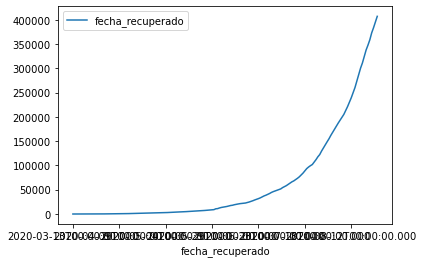

In [109]:
showByDate('fecha_recuperado',dfCovid)

Text(0.5, 1.0, 'Total Casos')

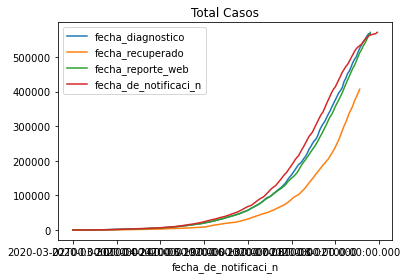

In [111]:
showByDate('fecha_diagnostico',dfCovid)
showByDate('fecha_recuperado',dfCovid)
showByDate('fecha_reporte_web',dfCovid)
showByDate('fecha_de_notificaci_n',dfCovid)
plt.title("Total Casos")

In [37]:
showByDate('fecha_de_recuperado')

KeyError: 'fecha_de_recuperado'